# RANDOM FOREST:

### El Random Forest es un algoritmo de aprendizaje supervisado. El "bosque" que construye, es un conjunto de árboles de decisión, usualmente entrenados con el método "bagging". La idea general de este método es que la combinación de varios modelos (por ejemplo, varios árboles de decisión) reduce la varianza del modelo, probablemente sin aumentar el sesgo.

In [4]:
# Importar librerias

import pandas as pd
from sklearn.datasets import load_wine

In [6]:
# Cargar el conjunto de datos

# Cargar el conjunto de datos
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Análisis exploratorio de datos

Es importante explorar el conjunto de datos antes de entrenar el modelo. Podemos usar métodos como head(), info() o describe() para obtener una visión general del conjunto de datos. También podríamos comprobar si hay valores nulos en nuestro conjunto de datos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

División de los datos en conjunto de entrenamiento y prueba

Después de realizar el análisis exploratorio de los datos, el siguiente paso sería dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Esta división es crucial para evaluar el rendimiento de nuestro modelo.

Utilizaremos la función train_test_split de sklearn para realizar esta división. La proporción de división más comúnmente utilizada es 80:20, donde el 80% de los datos se utilizan para el entrenamiento y el 20% para la prueba.

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba

from sklearn.model_selection import train_test_split

# Definimos nuestras variables X e y

X = df.drop('target', axis=1)
y = df['target']

# Dividimos los datos en conjunto de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entrenar el modelo

from sklearn.ensemble import RandomForestClassifier

# Definimos el modelo

model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators es el número de árboles que queremos usar

# Entrenamos el modelo

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Hacer predicciones

y_pred = model.predict(X_test)

In [12]:
# Evaluar el modelo

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculamos la exactitud del modelo

print(f'Exactitud del modelo: {accuracy_score(y_test, y_pred)}')
print(f'Reporte de clasificación: \n {classification_report(y_test, y_pred)}')

Exactitud del modelo: 1.0
Reporte de clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



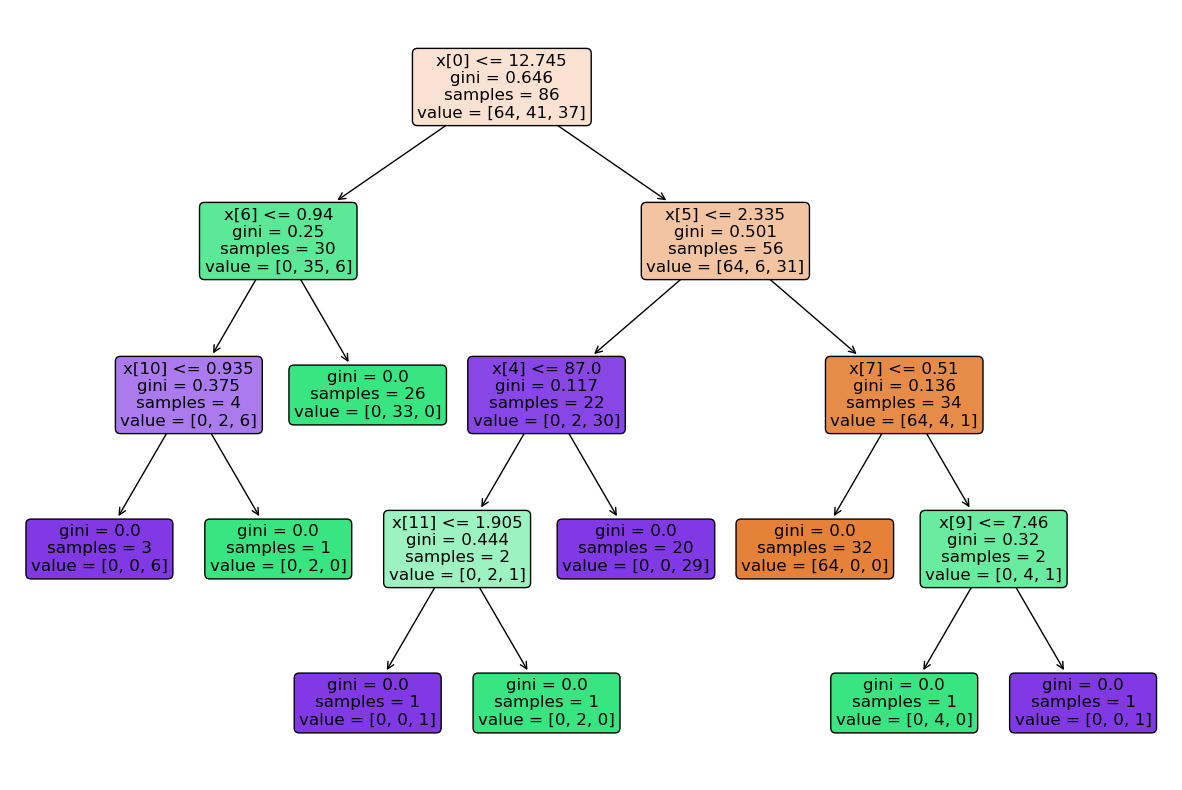

In [14]:
# Vamos a graficar el arbol.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Selección del árbol individual
estimator = model.estimators_[5] # cambiar el índice para seleccionar otro árbol

plt.figure(figsize=(15,10))
plot_tree(estimator,
          filled=True, impurity=True,
          rounded=True)
plt.show()

Este código generará una visualización del sexto árbol en tu modelo de bosque aleatorio. Puedes cambiar el número en el índice del estimador para visualizar un árbol diferente.

Cada nodo en el árbol muestra el criterio de división, la impureza del nodo (Gini impurity), el número total de muestras en ese nodo, y el número de muestras de cada clase. Los nodos finales, o "hojas", indicarán qué clase se predice para las muestras que caen en ese nodo.

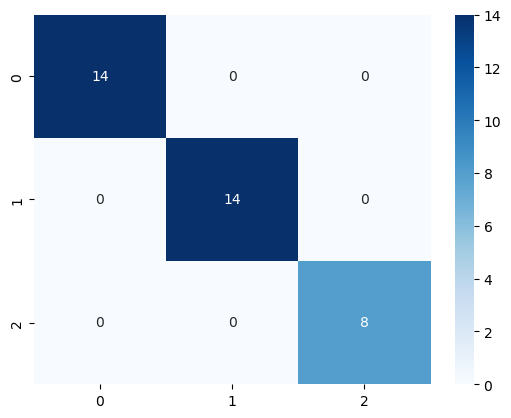

In [15]:
import seaborn as sns

# Graficar la matriz de confusión

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()